## Feature Scaling

Let us take an example of multiple feature problem

|Size in sqft   |No of bedroom  | Price ($) in $1000's  |
|:-------------:|:-------------:|:---------------------:|
|$X_1$          |$X_2$          |                       |
|2000           |5              |500                    |
|300            |1              |200                    |

### Model function

$$ f_{\mathbf{w},b}(\mathbf{X}) =  w_0X_0 + w_1X_1 + b \tag{1}$$

Here we have two features (i.e size of house in sqft and the number of bedrooms) that can be used for prediction of house price. Let us take the first row of input i.e.

- $X_1^{(1)}$ - 2000
- $X_2^{(1)}$ - 5
- $y^{(1)}$ - 500

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.linear_regression import run_gradient_descent, model_function, compute_cost

In [2]:
X = np.array([[2000, 5], [300, 1]])
y = np.array([500, 200])

In [3]:
w = np.array([50, 0.1])
predicted_price = model_function(X[0,:], w, 50)
print(f"Predicted Price: ${(predicted_price * 1000):0.2f}")

Predicted Price: $100050500.00


In [4]:
w = np.array([0.1, 50])
predicted_price = model_function(X[0,:], w, 50)
print(f"Predicted Price: ${(predicted_price * 1000):0.2f}")

Predicted Price: $500000.00


### Choosing different values for vector w

|$w_1$  |$w_2$  |b      |predicted price (1000$)|
|:------|:------|:------|:----------------------|
|50     |0.1    |50     |100050.5               |
|0.1    |50     |50     |500                    |

Looking at the examples above for two different values for vector w, the model will mostly choose a smaller value for $w_i$ if $X_i$ is large and a larger value for $w_i$ if $X_i$ is small when we run the gradient descent algorithm

**Problems of large difference in features**

- **Feature graph**: If we plot the training data on the feature graph then some of the axis will be of much larger scale as compared to other axis
- **Cost Function graph**: Since with a small change of multiplication factors for model parameters will lead to a big change in cost, the contour graph would form ellipses that will be small from one edge and large from other edge. In such cases the gradient descent algorithm with jump oftenly and might take longer time to reach the global minimum


#### Plotting feature graph

In [5]:
# Size in sqft
temp_X1 = np.random.randint(500,1200, 20)

# Rooms 
temp_X2 = np.random.randint(2,6,20)

(0.0, 50.0)

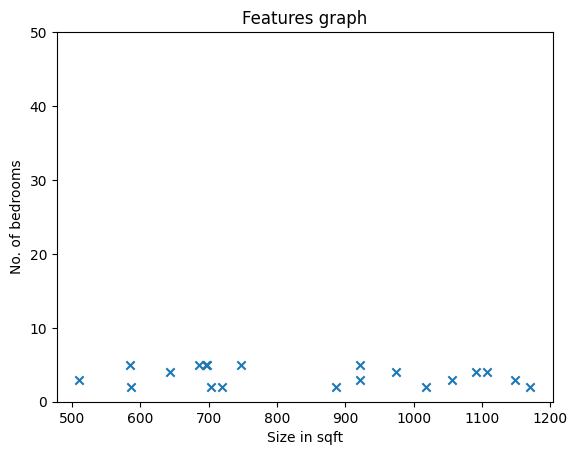

In [6]:
plt.scatter(temp_X1, temp_X2, marker='x')
plt.xlabel("Size in sqft")
plt.ylabel("No. of bedrooms")
plt.title("Features graph")
plt.ylim(0, 50)

In [7]:
def plot_costs_graph(X, y, w, b):
    [mesh_w1, mesh_w2] = np.meshgrid(w[:,0], w[:,1])

    l = mesh_w1.shape[0]
    costs = np.zeros((l,l))

    for i in range(l):
        for j in range(l):
            temp_w = np.array([mesh_w1[i,j], mesh_w2[i,j]])
            costs[i,j] = compute_cost(X, y, temp_w, b)
    
    plt.contour(mesh_w1, mesh_w2, costs)
    
    plt.title('Contour Plot')
    plt.xlabel('w1')
    plt.ylabel('w2')

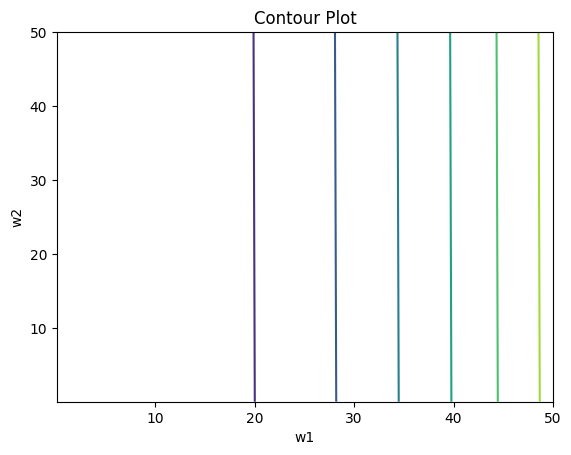

In [8]:
w_vec = np.array([[x1, x2] for x1, x2 in zip(np.linspace(50, 0.1, num=100), np.linspace(0.1, 50, num=100))])
b = 50
plot_costs_graph(X, y, w_vec, b)

> In the above contour graph, since the ellipse is too large in Y axis therefore the plot appears like a straight line

Below are the example graphs of how it will look

<img src="./images/feature_scaling/01_features_diff_problems.jpg" style=" width: 60%; ">

In [9]:
temp_X1 = np.random.randint(500,1200, 20)
temp_X2 = np.random.randint(2,6,20)

In [10]:
mean_X1 = temp_X1.mean()
max_X1 = temp_X1.max()
min_X1 = temp_X1.min()
std_deviation_X1 = temp_X1.std(axis=0)

mean_X2 = temp_X2.mean()
max_X2 = temp_X2.max()
min_X2 = temp_X2.min()
std_deviation_X2 = temp_X2.std(axis=0)

### Solution

One of the solutions is to scale the data using some transformations on the features such that it will scale from a equal range.

**Implementation 1: Feature Scaling i.e. dividing by the maximum value of the feature**

$$X_{(j scaled)}^{(i)} = \frac{X_{j}^{(i)}}{max(X_{j})} \tag{1}$$


In [11]:
scaled_temp_X1 = temp_X1 / max_X1
scaled_temp_X2 = temp_X2 / max_X2

**Implementation 2: Mean Normalization i.e Dividing the diff of mean and $X_j^i$ by difference between maximum and minimun of $X_j$**

$$X_{(j scaled)}^{(i)} = \frac{X_{j}^{(i)} - \mu_{j}}{max(X_{j}) - min(X_{j})} \tag{1}$$

In [12]:
mean_scaled_X1 = (temp_X1 - mean_X1) / (max_X1 - min_X1)
mean_scaled_X2 = (temp_X2 - mean_X2) / (max_X2 - min_X2)

**Implementation 3: Z score normalization**
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [13]:
z_scaled_X1 = (temp_X1 - mean_X1) / std_deviation_X1
z_scaled_X2 = (temp_X2 - mean_X2) / std_deviation_X2

### Plotting normalized features

Text(0.5, 0.98, 'Distribution of features before, during, after normalization')

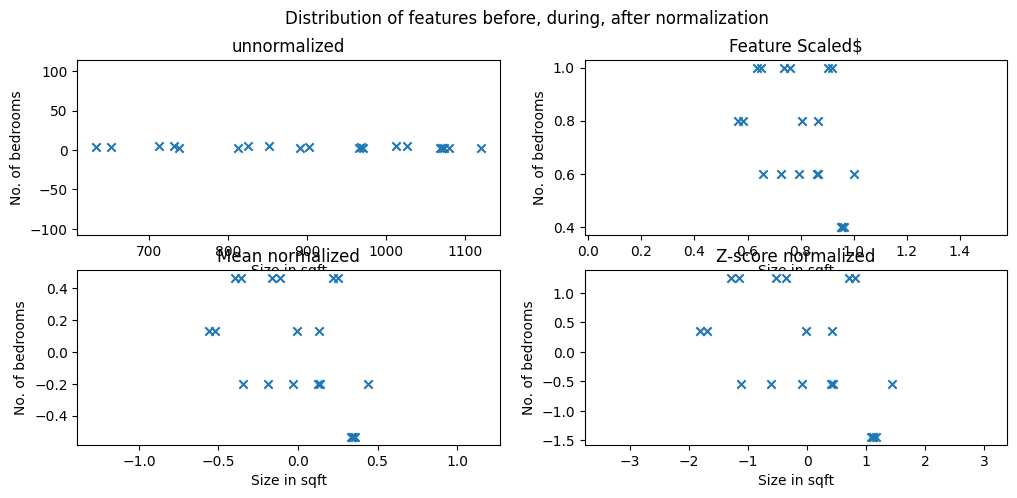

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0,0].scatter(temp_X1, temp_X2, marker='x')
ax[0,0].set_xlabel("Size in sqft")
ax[0,0].set_ylabel("No. of bedrooms")
ax[0,0].set_title("unnormalized")
ax[0,0].axis('equal')

ax[0,1].scatter(scaled_temp_X1, scaled_temp_X2, marker='x')
ax[0,1].set_xlabel("Size in sqft")
ax[0,1].set_ylabel("No. of bedrooms")
ax[0,1].set_title(r"Feature Scaled$")
ax[0,1].axis('equal')

ax[1,0].scatter(mean_scaled_X1, mean_scaled_X2, marker='x')
ax[1,0].set_xlabel("Size in sqft")
ax[1,0].set_ylabel("No. of bedrooms")
ax[1,0].set_title(r"Mean normalized")
ax[1,0].axis('equal')

ax[1,1].scatter(z_scaled_X1, z_scaled_X2, marker='x')
ax[1,1].set_xlabel("Size in sqft")
ax[1,1].set_ylabel("No. of bedrooms")
ax[1,1].set_title(r"Z-score normalized")
ax[1,1].axis('equal')

fig.suptitle("Distribution of features before, during, after normalization")

## Feature Engineering

> Using intuition to design **new features**, by transforming or combining original features

Let us take another example of multiple feature problem

|Front Size in ft   |Depth Size in ft  | Price ($) in $1000's  |
|:-----------------:|:----------------:|:---------------------:|
|$X_1$              |$X_2$             |                       |
|20                 |50                |500                    |
|10                 |30                |200                    |

### Model function

$$ f_{\mathbf{w},b}(\mathbf{X}) =  w_1X_1 + w_2X_2 + b \tag{1}$$

This model would work OK. But if we look at the features we can see that the area can be calculated from the product of $X_1$ and $X_2$ which is a more better factor to predict the house price. So we can create a new feature $X_3$ using $X_1$ and $X_2$

Our new features now become:

|Front Size in ft   |Depth Size in ft  |Area in sqft        | Price ($) in $1000's  |
|:-----------------:|:----------------:|:------------------:|:---------------------:|
|$X_1$              |$X_2$             |$X_3 = X_1 * X_2$   |                       |
|20                 |50                |1000                |500                    |
|10                 |30                |300                 |200                    |

Hence our new model function becomes

$$ f_{\mathbf{w},b}(\mathbf{X}) =  w_1X_1 + w_2X_2 + w_3X_3 + b \tag{2}$$


## Polynomial Regression using feature engineering

The model does not always perform good by being linear function. It can also be a polynomial function which can be represented as

$$ f_{\mathbf{w},b}(\mathbf{X}) =  w_1X_1 + w_2X_2^2 + w_3X_3^3 + .... + w_nX_n^n + b \tag{2}$$

We will use feature engineering to create a polynomial function

In [15]:
X1 = np.arange(0, 20, 1)
y1 = 1 + X1 ** 2

In [16]:
X1.reshape(-1, 1)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [17]:
w_new, b_new = run_gradient_descent(X1.reshape(-1, 1), y1, np.zeros(1), 1)

print(f"After running gradient descent the value of w & b: ({w_new}, {b_new})")

After running gradient descent the value of w & b: ([15.57178829], -11.529830877907644)


In [18]:
y1_predictions = model_function(X1.reshape(-1,1), w_new, b_new)
y1_predictions

array([-11.52983088,   4.04195742,  19.61374571,  35.185534  ,
        50.7573223 ,  66.32911059,  81.90089888,  97.47268718,
       113.04447547, 128.61626377, 144.18805206, 159.75984035,
       175.33162865, 190.90341694, 206.47520524, 222.04699353,
       237.61878182, 253.19057012, 268.76235841, 284.3341467 ])

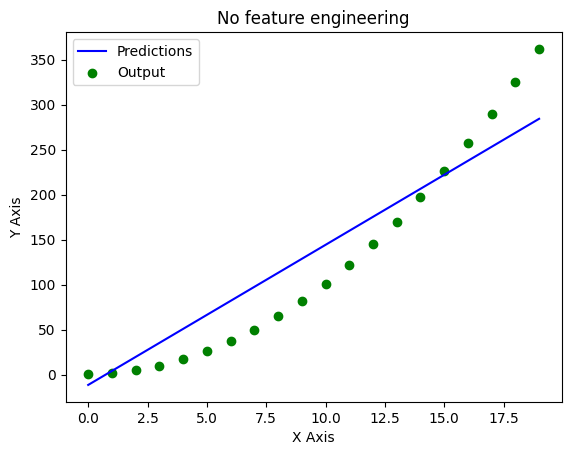

In [19]:
plt.plot(X1, y1_predictions, label="Predictions", color='blue')
plt.scatter(X1, y1, label="Output", color='green')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("No feature engineering")
plt.legend()

The graph above shows that our linear function does not satisfy all the points although it is best w and b for the provided input feature X which gives the lowest cost

We will now feature engineer the value of $X_1$ to creat a new feature $X_2$ i.e. the square of $X_1$ and run the same gradient descent to find the new model function

In [20]:
X1 = np.arange(0, 20, 1)
y2 = 1 + X1 ** 2

X2 = X1 ** 2
print(X2, y2)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361] [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


In [21]:
w_new, b_new = run_gradient_descent(X2.reshape(-1, 1), y2, np.array([0]), 1, alpha=0.00001, num_iters=10000)

print(f"After running gradient descent the value of w & b: ({w_new}, {b_new})")

After running gradient descent the value of w & b: ([0.99998159], 1.004193347042815)


In [22]:
y2_predictions = model_function(X2.reshape(-1,1), w_new, b_new)
y2_predictions

array([  1.00419335,   2.00417494,   5.00411971,  10.00402767,
        17.00389881,  26.00373314,  37.00353065,  50.00329134,
        65.00301521,  82.00270227, 101.00235252, 122.00196594,
       145.00154255, 170.00108234, 197.00058532, 226.00005148,
       256.99948082, 289.99887334, 324.99822905, 361.99754794])

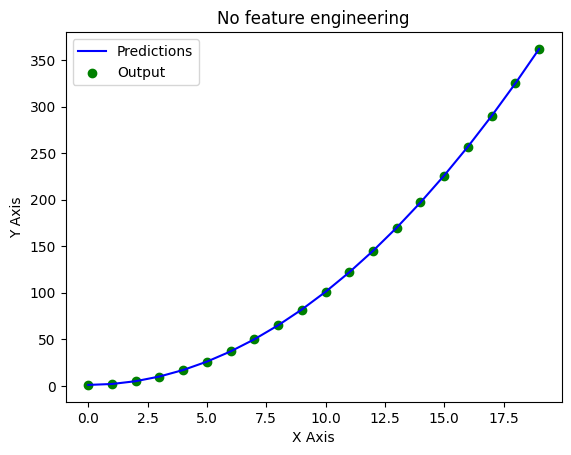

In [23]:
plt.plot(X1, y2_predictions, label="Predictions", color='blue')
plt.scatter(X1, y1, label="Output", color='green')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("No feature engineering")
plt.legend()

We can see that be feature engineering the value of X1 how we have updated the function to make it a polynomial function so as to predict the accurate values.